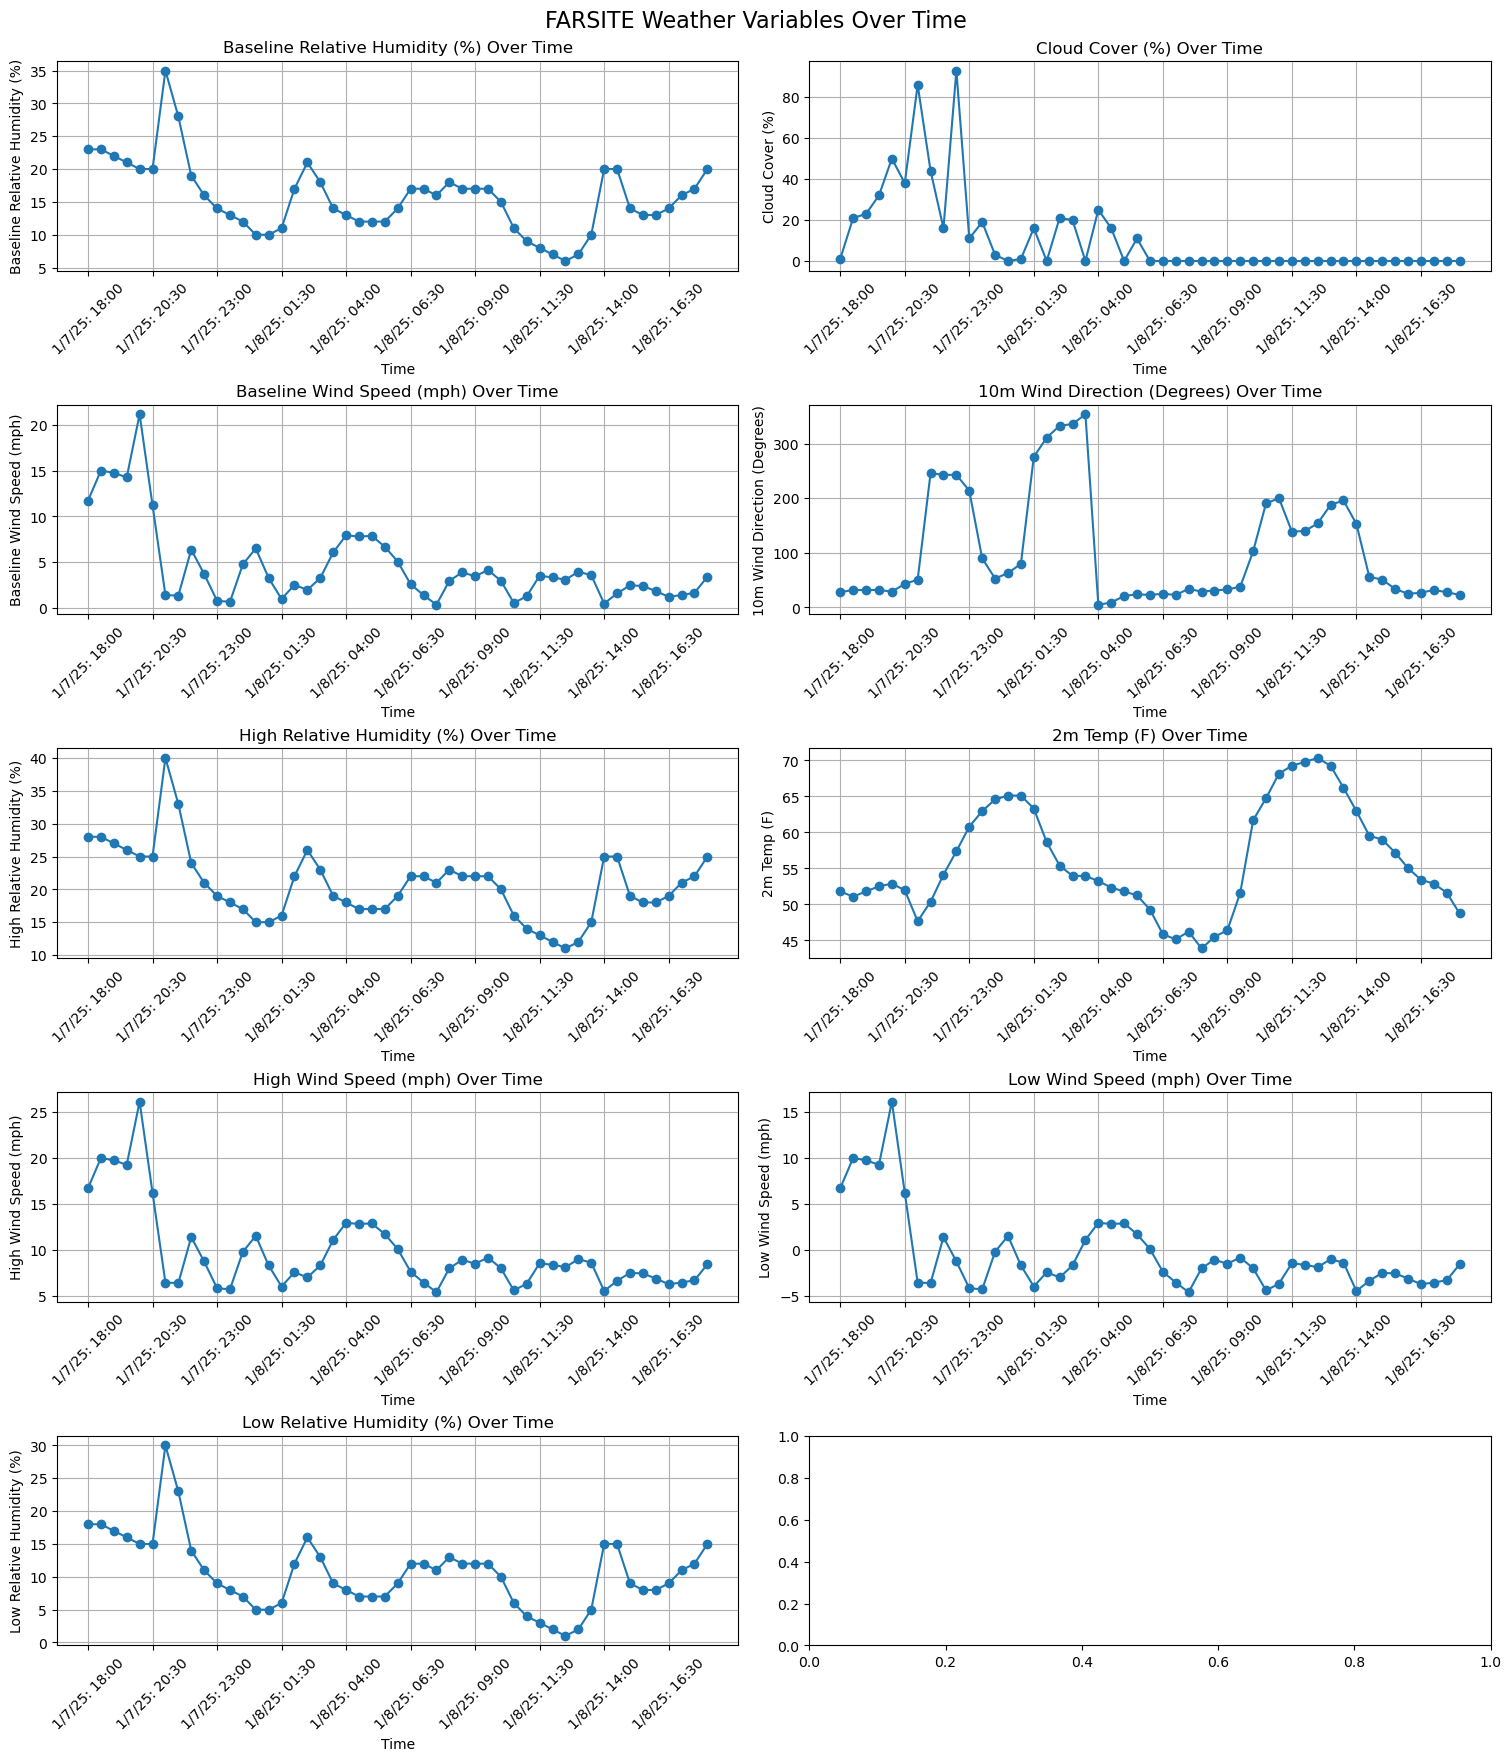

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load the CSV
df = pd.read_csv('Binned Farsite Data  - Sheet1.csv')

# Start time
start_time = datetime(2025, 1, 7, 18, 0)
time_interval = timedelta(minutes=30)
df['Time'] = [start_time + i * time_interval for i in range(len(df))]
df['Formatted Time'] = df['Time'].dt.strftime('%-m/%-d/%y: %H:%M')
df.set_index('Formatted Time', inplace=True)

# Variables to plot
variables = {
    '2m Relative Humidity (%)': 'Baseline Relative Humidity (%)',
    'Cloud Cover (%)': 'Cloud Cover (%)',
    '10m Wind Speed (mph)': 'Baseline Wind Speed (mph)',
    '10m Wind Direction (Degrees)': '10m Wind Direction (Degrees)',
    'High Relative Humidity (%)': 'High Relative Humidity (%)',
    '2m Temp (F)': '2m Temp (F)',
    'High Wind Speed (mph)': 'High Wind Speed (mph)',
    'Low Wind Speed (mph)': 'Low Wind Speed (mph)',
    'Low Relative Humidity (%)': 'Low Relative Humidity (%)',
}

# Plotting all in one figure
cols = 2
rows = (len(variables) + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3.5), constrained_layout=True)
axes = axes.flatten()

for idx, (var, label) in enumerate(variables.items()):
    if var in df.columns:
        ax = axes[idx]
        ax.plot(df.index, df[var], marker='o', linestyle='-')
        ax.set_title(f'{label} Over Time')
        ax.set_xlabel('Time')
        ax.set_ylabel(label)
        tick_positions = df.index[::5]
        ax.set_xticks(tick_positions)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)
    else:
        fig.delaxes(axes[idx])

fig.suptitle("FARSITE Weather Variables Over Time", fontsize=16)
fig.savefig("farsite_combined_plot_cleaned.png", dpi=300)
plt.show()

